## **Import libraries**

In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import gdown

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [56]:

url_link = 'https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P'
output_file_data = '/content/dataset.zip'

gdown.download(url_link, output_file_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100%|██████████| 65.7M/65.7M [00:02<00:00, 25.6MB/s]


'/content/dataset.zip'

In [57]:
! unzip dataset.zip
! rm dataset.zip
! rm sample_data -r -f


## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [58]:
datasetTrain, datasetTest = keras.utils.image_dataset_from_directory(
    '/content/',
    labels="inferred",
    label_mode="binary",
    class_names=['yes', 'no'],
    color_mode="grayscale",
    batch_size=64,
    image_size=(256, 256),
    shuffle=True,
    seed=20,
    validation_split=0.2,
    subset='both',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

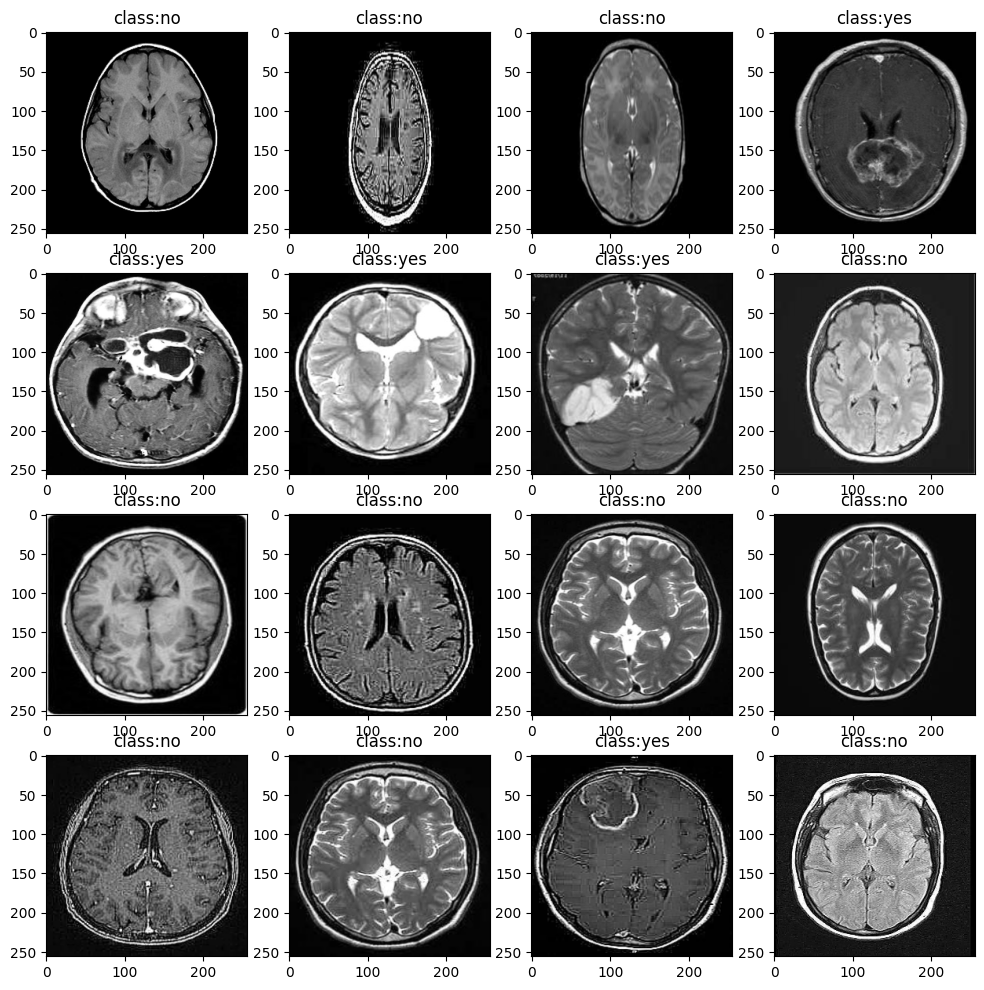

In [61]:
classes = ['yes', 'no']
a=1
img, lb = next(datasetTrain.take(a).as_numpy_iterator())

y = plt.figure(figsize=(12, 12))


for i in range(16):
  image, label = img[i], lb[i]
  j=i+1
  y.add_subplot(4, 4, j)
  plt.imshow(image, cmap='gray')
  b=int(label[0])
  plt.title(f"class:{classes[b]}")


## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 64)       

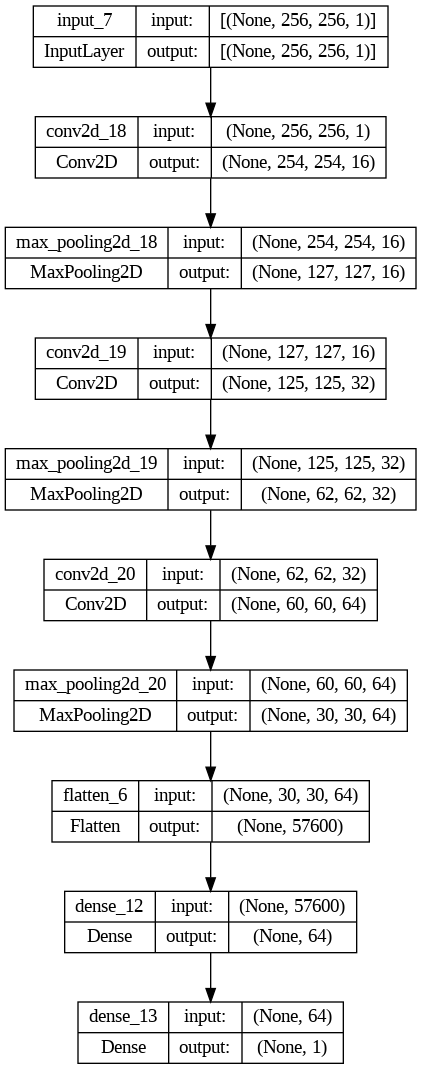

In [62]:
model_seq = Sequential([
    Input(shape=(256, 256, 1)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_seq.summary()
tf.keras.utils.plot_model(model_seq, show_shapes=True)

In [64]:
model_seq.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### **Train the model**

In [65]:
history = model_seq.fit(
    datasetTrain,
    epochs=15,
    validation_data=datasetTest
)

Epoch 1/15
38/38 [==============================] - 7s 136ms/step - loss: 27.5262 - accuracy: 0.6775 - val_loss: 0.4702 - val_accuracy: 0.7633
Epoch 2/15
38/38 [==============================] - 4s 86ms/step - loss: 0.3665 - accuracy: 0.8442 - val_loss: 0.3030 - val_accuracy: 0.8800
Epoch 3/15
38/38 [==============================] - 6s 142ms/step - loss: 0.1640 - accuracy: 0.9429 - val_loss: 0.1518 - val_accuracy: 0.9550
Epoch 4/15
38/38 [==============================] - 4s 91ms/step - loss: 0.0621 - accuracy: 0.9829 - val_loss: 0.1147 - val_accuracy: 0.9650
Epoch 5/15
38/38 [==============================] - 5s 124ms/step - loss: 0.0274 - accuracy: 0.9958 - val_loss: 0.1528 - val_accuracy: 0.9567
Epoch 6/15
38/38 [==============================] - 4s 89ms/step - loss: 0.0222 - accuracy: 0.9975 - val_loss: 0.1196 - val_accuracy: 0.9733
Epoch 7/15
38/38 [==============================] - 6s 134ms/step - loss: 0.0094 - accuracy: 0.9983 - val_loss: 0.1070 - val_accuracy: 0.9750
Epoch 8/

### **Test the model**

In [66]:
num_1 = model_seq.evaluate(datasetTrain)
a= num_1[0]
b=num_1[1]
print('LOSS_TRAIN & ACCURACY_TRAIN', a , b )
num_2 = model_seq.evaluate(datasetTest)
c= num_2[0]
d=num_2[1]
print('LOSS_TEST & ACCURACY_TEST', c , d )


38/38 [==============================] - 3s 54ms/step - loss: 3.9361e-04 - accuracy: 1.0000
LOSS_TRAIN & ACCURACY_TRAIN 0.0003936102148145437 1.0
10/10 [==============================] - 1s 55ms/step - loss: 0.1402 - accuracy: 0.9700
LOSS_TEST & ACCURACY_TEST 0.14021548628807068 0.9700000286102295


2/2 [==============================] - 0s 12ms/step


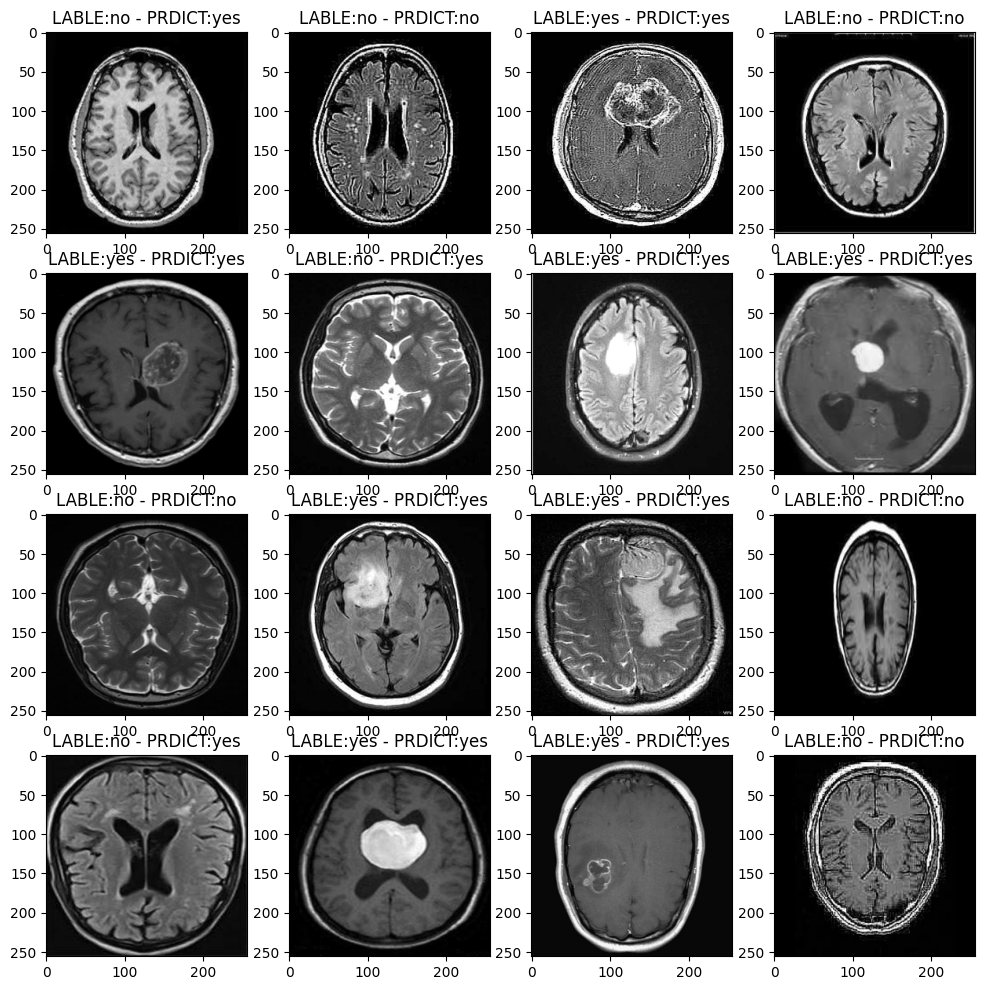

In [79]:
classes = ['yes', 'no']
images, labels = next(datasetTrain.take(1).as_numpy_iterator())
y = model_seq.predict(images)
fig = plt.figure(figsize=(12, 12))

for i in range(16):

  img, lb, pr = images[i], labels[i], y[i]
  j=i+1
  fig.add_subplot(4, 4, j)
  plt.imshow(img, cmap='gray')
  a= int(lb[0])
  b=int(pr[0])
  plt.title(f'LABLE:{classes[a]} - PRDICT:{classes[b]}')

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

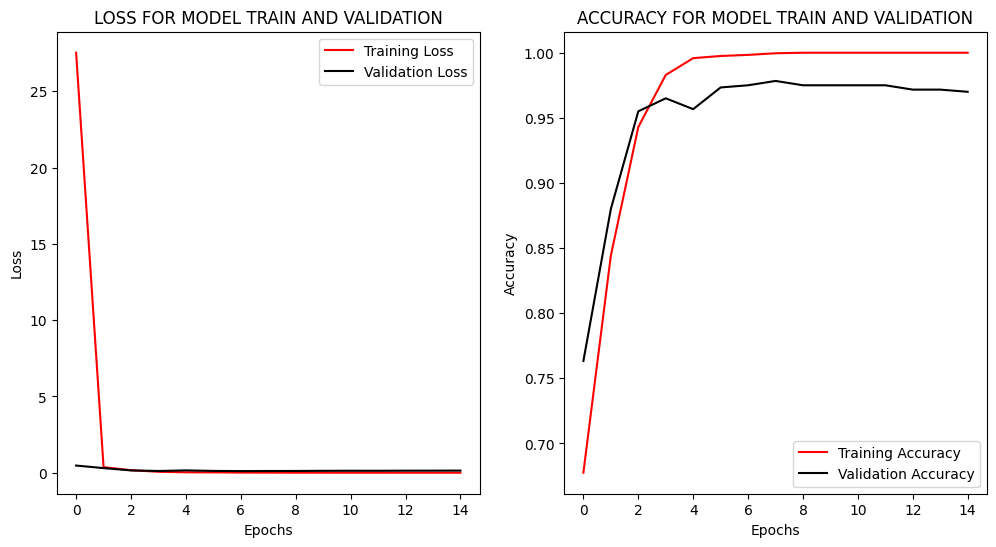

In [75]:
# plot training and test loss
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color ='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color ='black')
plt.title('LOSS FOR MODEL TRAIN AND VALIDATION')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy' , color ='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy' , color ='black')
plt.title('ACCURACY FOR MODEL TRAIN AND VALIDATION')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## **2.Functional API**

### **Build a model**

In [80]:
inputs_model = tf.keras.Input(shape=(256, 256, 1))
x = Conv2D(16, (3, 3), activation='relu')(inputs_model)
x = MaxPool2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs_model = Dense(1, activation='sigmoid')(x)

model_func = tf.keras.Model(inputs=inputs_model, outputs=outputs_model)
model_func.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 64)        1849

In [81]:
model_func.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Train the model**

In [82]:
history = model_func.fit(
    datasetTrain,
    epochs=15,
    validation_data=datasetTest
)

Epoch 1/15
38/38 [==============================] - 7s 95ms/step - loss: 8.9907 - accuracy: 0.6971 - val_loss: 0.4384 - val_accuracy: 0.7767
Epoch 2/15
38/38 [==============================] - 4s 87ms/step - loss: 0.3641 - accuracy: 0.8196 - val_loss: 0.2856 - val_accuracy: 0.8800
Epoch 3/15
38/38 [==============================] - 4s 106ms/step - loss: 0.1913 - accuracy: 0.9262 - val_loss: 0.1829 - val_accuracy: 0.9400
Epoch 4/15
38/38 [==============================] - 5s 103ms/step - loss: 0.0888 - accuracy: 0.9683 - val_loss: 0.1370 - val_accuracy: 0.9550
Epoch 5/15
38/38 [==============================] - 4s 87ms/step - loss: 0.0548 - accuracy: 0.9871 - val_loss: 0.1362 - val_accuracy: 0.9650
Epoch 6/15
38/38 [==============================] - 6s 140ms/step - loss: 0.0247 - accuracy: 0.9942 - val_loss: 0.1320 - val_accuracy: 0.9700
Epoch 7/15
38/38 [==============================] - 6s 140ms/step - loss: 0.0147 - accuracy: 0.9979 - val_loss: 0.1397 - val_accuracy: 0.9733
Epoch 8/1

### **Test the model**

In [83]:
num_1 = model_func.evaluate(datasetTrain)
a= num_1[0]
b=num_1[1]
print('LOSS_TRAIN & ACCURACY_TRAIN', a , b )
num_2 = model_func.evaluate(datasetTest)
c= num_2[0]
d=num_2[1]
print('LOSS_TEST & ACCURACY_TEST', c , d )

38/38 [==============================] - 3s 53ms/step - loss: 0.0074 - accuracy: 1.0000
LOSS_TRAIN & ACCURACY_TRAIN 0.007442854810506105 1.0
10/10 [==============================] - 1s 53ms/step - loss: 0.1668 - accuracy: 0.9767
LOSS_TEST & ACCURACY_TEST 0.16676761209964752 0.9766666889190674


2/2 [==============================] - 0s 10ms/step


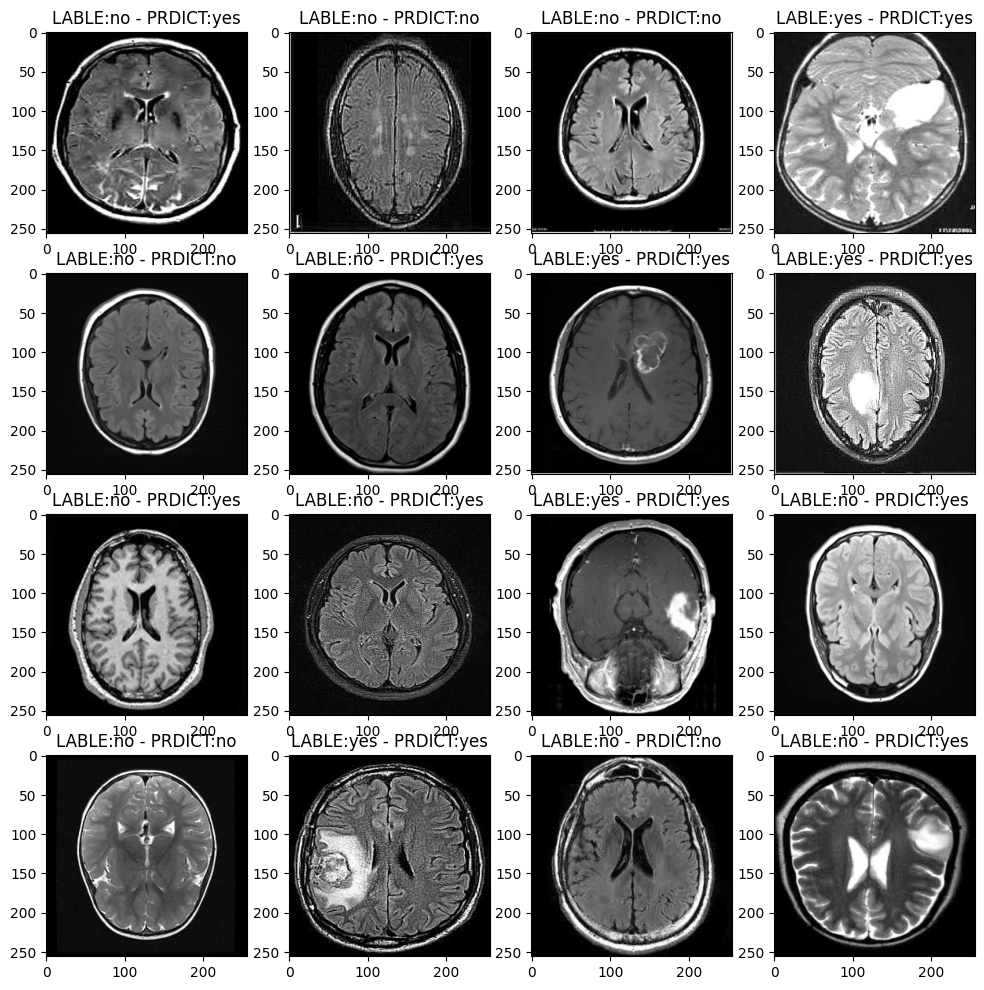

In [86]:
classes = ['yes', 'no']
imgg, labels = next(datasetTrain.take(1).as_numpy_iterator())
y = model_seq.predict(imgg)
fig = plt.figure(figsize=(12, 12))

for i in range(16):

  img, lb, pr = imgg[i], labels[i], y[i]
  j=i+1
  fig.add_subplot(4, 4, j)
  plt.imshow(img, cmap='gray')
  a= int(lb[0])
  b=int(pr[0])
  plt.title(f'LABLE:{classes[a]} - PRDICT:{classes[b]}')

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

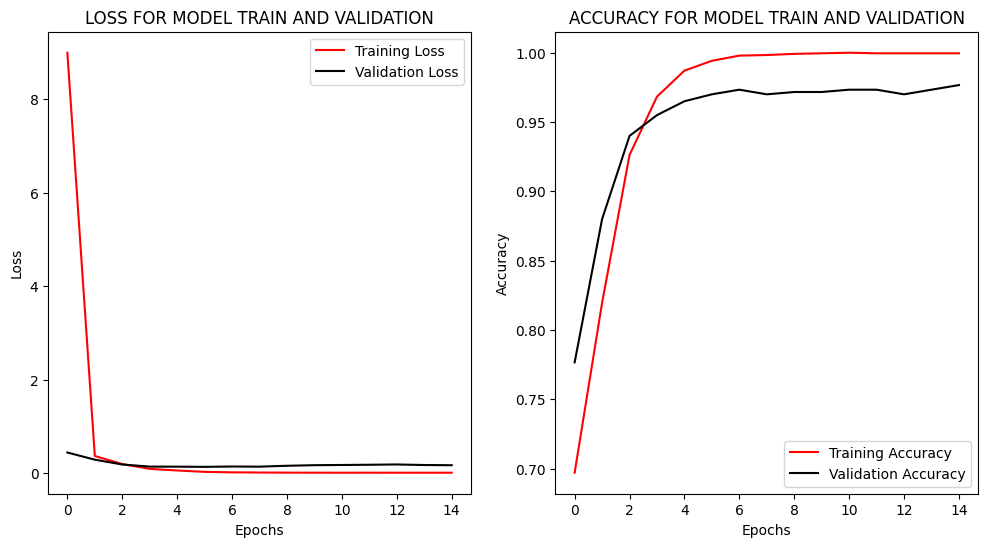

In [84]:
# plot training and test loss
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color ='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color ='black')
plt.title('LOSS FOR MODEL TRAIN AND VALIDATION')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy' , color ='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy' , color ='black')
plt.title('ACCURACY FOR MODEL TRAIN AND VALIDATION')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()